In [6]:
from copy import deepcopy
import math
from Point import Point
from Rectangle import Rectangle
from visualizer_bit.main import Visualizer
import matplotlib.pyplot as plt
import numpy as np
vis = Visualizer()


[((-5, 1.5)),1, ((-5, 7)),4, ((-3, 4)),2, ((-2.5, 1)),3, ((-2, 6)),5, ((0, 3)),7, ((2, 7)),9, ((3, 5)),10, ((5, 0)),6, ((7, 1)),8] 0 (ro jest prostokąt([-5, 0]),None),([7, 7]),None
[((-2.5, 1)),3, ((-5, 1.5)),1, ((-3, 4)),2, ((-2, 6)),5, ((-5, 7)),4] 1 (ro jest prostokąt([-5, 0]),None),([-2, 7]),None
[((-5, 1.5)),1, ((-3, 4)),2, ((-2.5, 1)),3] 0 (ro jest prostokąt([-5, 0]),None),([-2, 4]),None
[((-5, 1.5)),1, ((-3, 4)),2] 1 (ro jest prostokąt([-5, 0]),None),([-3, 4]),None
[((-5, 1.5)),1] 0 (ro jest prostokąt([-5, 0]),None),([-3, 1.5]),None
[((-3, 4)),2] 0 (ro jest prostokąt([-5, 1.5]),None),([-3, 4]),None
[((-2.5, 1)),3] 1 (ro jest prostokąt([-3, 0]),None),([-2, 4]),None
[((-5, 7)),4, ((-2, 6)),5] 0 (ro jest prostokąt([-5, 4]),None),([-2, 7]),None
[((-5, 7)),4] 1 (ro jest prostokąt([-5, 4]),None),([-5, 7]),None
[((-2, 6)),5] 1 (ro jest prostokąt([-5, 4]),None),([-2, 7]),None
[((5, 0)),6, ((7, 1)),8, ((0, 3)),7, ((3, 5)),10, ((2, 7)),9] 1 (ro jest prostokąt([-2, 0]),None),([7, 7]),None


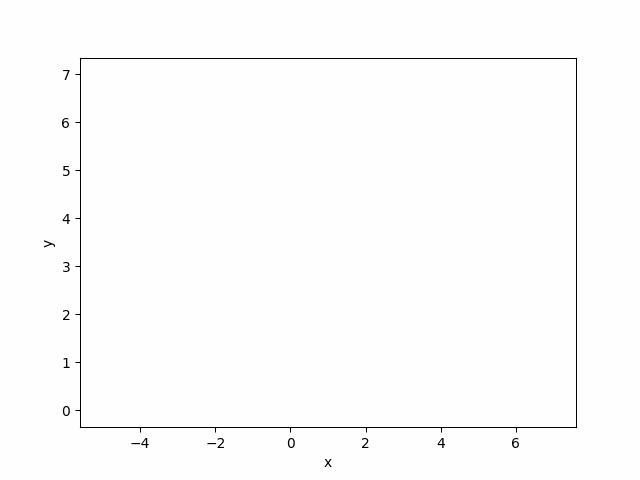

In [16]:
from copy import deepcopy
import math
from Point import Point
from Rectangle import Rectangle
from visualizer_bit.main import Visualizer
import matplotlib.pyplot as plt
import numpy as np

def vis_rectangle(rec,_color):
    vis.add_polygon(rec.get_all_vertix_from_rectangle_on_2d(), fill = False, color = _color,alpha=1)

vis = Visualizer()
class KdTreeNode:
    def __init__(self,points,amount_of_dimensions,depth,rectangle=None):
        self.amount_of_dimensions = amount_of_dimensions
        self.depth = depth
        self.points = points
        self.left = None
        self.right = None
        if rectangle:
            self.rectangle = rectangle
        else:
            self.rectangle = Rectangle(None,None,points)
        vis.add_polygon(self.rectangle.get_all_vertix_from_rectangle_on_2d(), fill = False, alpha = 0.5)
        self.build()


    def build(self):
        if len(self.points)==1:
            vis_rectangle(self.rectangle, "orange")
            vis.add_point(self.points[0].cords,color = "orange")
            vis_rectangle(self.rectangle, "black")
            return
        
        self.points.sort(key = lambda x: x.cords[self.depth])
        median = math.ceil(len(self.points)/2)
        axes = self.points[median-1].cords[self.depth%self.amount_of_dimensions]
        left_rec, right_rec = self.devide_on_half_rectangle(self.rectangle, (self.depth)%self.amount_of_dimensions, axes)
        self.left = KdTreeNode(self.points[0:median], self.amount_of_dimensions, (self.depth+1)%self.amount_of_dimensions, left_rec )
        self.right = KdTreeNode(self.points[median:], self.amount_of_dimensions, (self.depth+1)%self.amount_of_dimensions, right_rec )
    
    def print_tree(self):
        print(self.points,self.depth, self.rectangle)
        if self.left:
            self.left.print_tree()
        if self.right:
            self.right.print_tree()

    # możliwe, że powinna zostać przeniesiona gdzieś indziej
    def devide_on_half_rectangle(self,rec, dimension_numer, axes):
        # jeden to dolny, czy tam po lewej
        # drugi to górny czy tam po prawej
        lower_left_1 = rec.lower_left
        upper_right_2 = rec.upper_right

        upper_right_1_cords = deepcopy(rec.upper_right.cords)
        upper_right_1_cords[dimension_numer] = axes
        upper_right_1 = Point(upper_right_1_cords)

        lower_left_2_cords = deepcopy(rec.lower_left.cords)
        lower_left_2_cords[dimension_numer] = axes
        lower_left_2 = Point(lower_left_2_cords)
        
        return Rectangle(lower_left_1,upper_right_1), Rectangle(lower_left_2,upper_right_2)
    
    def search_in_recangle(self,region):
        
        if self.left is None and self.right is None: # jesteśmy w liściu
            ans = region.points_in_rectangle(self.points)
            vis.add_point([(point.cords[0],point.cords[1]) for point in ans], color = "lime")
            return ans
        if region.is_contained(self.rectangle):
            vis.add_point([(point.cords[0],point.cords[1]) for point in self.points], color = "lime")
            return self.points
        if region.is_intersect(self.rectangle):
            return self.left.search_in_recangle(region) + self.right.search_in_recangle(region)
        return []
    
    


class KdTree:
    def __init__(self, points, amount_of_dimensions, begining_axis=0):
        points = [Point(point,e+1) for e,point in enumerate(points)]
        vis.add_point(test)
        self.begining_axis = begining_axis
        self.root = KdTreeNode(points,amount_of_dimensions,begining_axis,Rectangle(None,None,points))
        self.amount_of_dimensions = amount_of_dimensions
        self.points = points

        
    def search_in_recangle(self, region):
        vis.add_polygon(region.get_all_vertix_from_rectangle_on_2d(), fill = False, color = "red",alpha=1)
        region = self.root.rectangle.intersection(region)
        
        # vis.
        return self.root.search_in_recangle(region)
        
    
test = [(-5,1.5),(-3,4),(-2.5,1),(-5,7),(-2,6),(5,0),(0,3),(7,1),(2,7),(3,5)]
# vis.add_polygon([(0,0),(1,0),(1,1),(0,1)],fill=False)
# vis.add_polygon([(0,0),(1,0),(1,1),(0,2)],fill=False
a = KdTree(test,2)
a.root.print_tree()

print(a.search_in_recangle(Rectangle(Point((1,0)),Point((2,1)))))
vis.show()
vis.show_gif(interval=400)
# print([12,32]+[53,1])


In [7]:
import numpy as np
def random_points(n,x,y):
    res=[]
    for _ in range(n):
        res.append((np.random.uniform(0,x),np.random.uniform(0,y)))
    return res

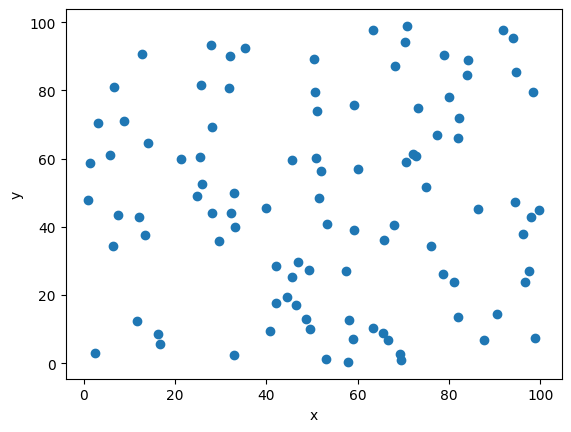

In [8]:
vis.clear()
cos = random_points(100,100,100)
vis.add_point(cos)

vis.show()

[((32.365230937875175, 43.96171526455368)),32, ((33.23351875564554, 39.8560436315585)),98, ((39.90406307436623, 45.64439492542136)),18, ((32.886641691499264, 49.89644938387299)),26, ((45.55368068411879, 59.6539438149547)),30, ((51.591666926627944, 48.51631978228753)),94, ((51.934558260410135, 56.23437102947716)),3, ((50.8814672581398, 60.216898760019)),10, ((50.70052764820806, 79.59812720240632)),20, ((51.21748586403686, 73.9397677067703)),92, ((53.21664606196658, 40.84639320183846)),51, ((59.185621176199945, 39.20701028211005)),99, ((65.72859619221319, 36.104944151184924)),5, ((68.08739097825207, 40.57780121324544)),47, ((76.03334616689911, 34.448926952960136)),58, ((96.16071669011507, 37.775192899360576)),70, ((98.09030205533703, 42.893616203114604)),24, ((60.21457493630693, 56.896412968577096)),7, ((70.54970134279517, 59.10196728117546)),12, ((72.25008211512804, 61.349199787719)),97, ((72.85271830768322, 60.672565159256294)),35, ((73.28582055695107, 74.79626724656353)),38, ((74.9251

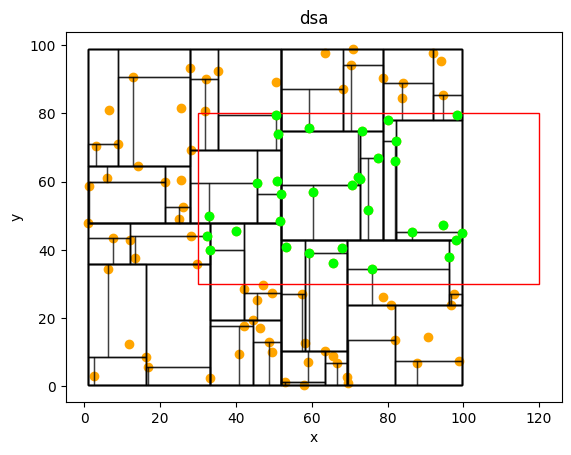

In [9]:
import kd_tree_vis
visual = kd_tree_vis.give_visualization(cos,(30,30),(120,80))
visual.add_title("dsa")
visual.show()